In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
dfxtest=pd.read_csv('/content/drive/My Drive/MachineLearning_GoogleCollab/Project - Neural Networks_Classify_Points/Test Cases(3).zip (Unzipped Files)/Logistic_X_Test.csv')
dfx=pd.read_csv('/content/drive/My Drive/MachineLearning_GoogleCollab/Project - Neural Networks_Classify_Points/Training Data(3).zip (Unzipped Files)/Logistic_X_Train.csv')
dfy=pd.read_csv('/content/drive/My Drive/MachineLearning_GoogleCollab/Project - Neural Networks_Classify_Points/Training Data(3).zip (Unzipped Files)/Logistic_Y_Train.csv')

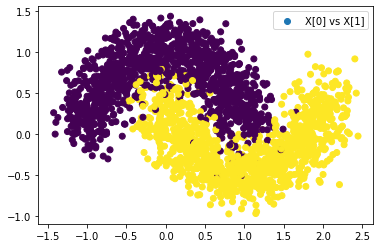

In [3]:
Xdata=dfx.values
Ydata=dfy.values
import matplotlib.pyplot as plt
plt.scatter(Xdata[:,0],Xdata[:,1],label='X[0] vs X[1]', c=Ydata)
plt.legend()
plt.show()

In [0]:
#print(Xdata.shape)
#print(Ydata.shape)
# Training Examples are 2250 with just 2 features 
# Splitting The Data For Cross Validation Set 
split=int(0.8*Xdata.shape[0])
Xtrain=Xdata[:split]
Ytrain=Ydata[:split]
Xval=Xdata[split:]
Yval=Ydata[split:]
Xtest=dfxtest.values

In [5]:
# Applying Neural Network
# Importing Required Lib
%tensorflow_version 1.x
from keras import models
from keras.layers import Dense

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
model=models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(2,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [0]:
#Compile The Model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
hist=model.fit(Xtrain,Ytrain,epochs=40,batch_size=32,validation_data=(Xval,Yval))

Train on 1800 samples, validate on 450 samples
Epoch 1/40
1800/1800 [==============================] - 0s 174us/step - loss: 0.6762 - acc: 0.6422 - val_loss: 0.6295 - val_acc: 0.7600
Epoch 2/40
1800/1800 [==============================] - 0s 48us/step - loss: 0.5720 - acc: 0.8039 - val_loss: 0.4885 - val_acc: 0.8489
Epoch 3/40
1800/1800 [==============================] - 0s 45us/step - loss: 0.4437 - acc: 0.8478 - val_loss: 0.3658 - val_acc: 0.8822
Epoch 4/40
1800/1800 [==============================] - 0s 45us/step - loss: 0.3499 - acc: 0.8756 - val_loss: 0.2921 - val_acc: 0.8978
Epoch 5/40
1800/1800 [==============================] - 0s 47us/step - loss: 0.2981 - acc: 0.8817 - val_loss: 0.2587 - val_acc: 0.8956
Epoch 6/40
1800/1800 [==============================] - 0s 48us/step - loss: 0.2724 - acc: 0.8922 - val_loss: 0.2363 - val_acc: 0.9067
Epoch 7/40
1800/1800 [==============================] - 0s 43us/step - loss: 0.2547 - acc: 0.8950 - val_loss: 0.2189 - val_acc: 0.9089
Epoch 8

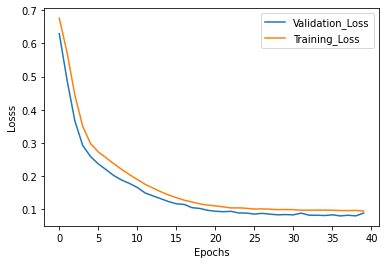

In [30]:
h=hist.history
#Plotting The Results For Clarity 
plt.plot(h['val_loss'],label='Validation_Loss')
plt.plot(h['loss'],label='Training_Loss')
plt.xlabel("Epochs")
plt.ylabel("Losss")
plt.legend()
plt.show()

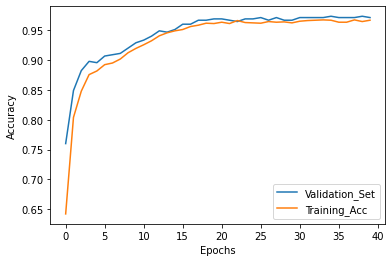

In [31]:
plt.plot(h['val_acc'],label='Validation_Set')
plt.plot(h['acc'],label='Training_Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
Y_=model.predict(Xtest)

In [0]:
import numpy as np

Ypred=np.zeros((Y_.shape),dtype='int')
Ypred[Y_>0.5]=1

In [0]:
Ypred=Ypred.reshape((Ypred.shape[0],))
dfresult=pd.DataFrame(Ypred,columns=['label'])

In [0]:
dfresult.to_csv('Ypredicted.csv',index=False)